In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")



x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [3]:
print(dataset.head())

   SizeFP  Nlan  T01  T02  T03  T04  T05  T06  T07  T08  T09  T10  T11  T12  \
0     647     3    4    3    5    3    3    3    4    5    4    5    4    4   
1     130     3    2    3    3    3    3    3    2    2    4    3    4    4   
2     254     2    3    3    2    3    3    4    2    3    4    5    4    3   
3    1056     3    2    2    4    2    2    1    3    5    4    4    5    4   
4     383     2    3    3    3    4    3    3    4    3    4    4    3    4   

   T13  T14  T15  Effort  
0    4    4    5    7871  
1    4    4    4     845  
2    2    3    3    2330  
3    3    2    3   21272  
4    5    4    4    4224  


In [4]:
y.shape

(62,)

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

In [6]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30) 

In [7]:
from sklearn.ensemble import  GradientBoostingRegressor

regr = GradientBoostingRegressor(random_state=0)
regr.fit(X_train,y_train.ravel())
y_pred=regr.predict(X_test)
 

In [8]:
#accuracy on trained Model
regr.fit(X_train, y_train)
print(regr.score(X_train,y_train))

0.9993808002575647


C:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
print(regr.score(X_test,y_test))

0.06477087894638589


In [10]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

In [11]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:
y_pred

array([[0.1929003 ],
       [0.12396541],
       [0.09659397],
       [0.00857649],
       [0.11208559],
       [0.08469355],
       [0.02520889],
       [0.1061913 ],
       [0.04975922],
       [0.01870039],
       [0.10958861],
       [0.01116924],
       [0.11606503]])

In [13]:
y_test

array([[0.05651947],
       [0.14921329],
       [0.07157231],
       [0.00602114],
       [0.06136807],
       [0.13921503],
       [0.04526945],
       [0.07440858],
       [0.10459349],
       [0.00819192],
       [0.10882414],
       [0.01029931],
       [0.16567635]])

In [14]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [15]:

def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 9929025.792516826

RMSE:
 3151.0356698261644

MAPE:
 45.87152693524584

SMAPE:
 37.24

 Adj R2 score:
 0.9990412391084873


In [16]:
y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))




In [17]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0          4150.0      12757.130862
1         10000.0       8406.580756
2          5100.0       6679.142291
3           963.0       1124.271088
4          4456.0       7656.833418
5          9369.0       5928.094592
6          3440.0       2173.958292
7          5279.0       7284.839275
8          7184.0       3723.353987
9          1100.0       1763.200527
10         7451.0       7499.246703
11         1233.0       1287.901718
12        11039.0       7907.980216


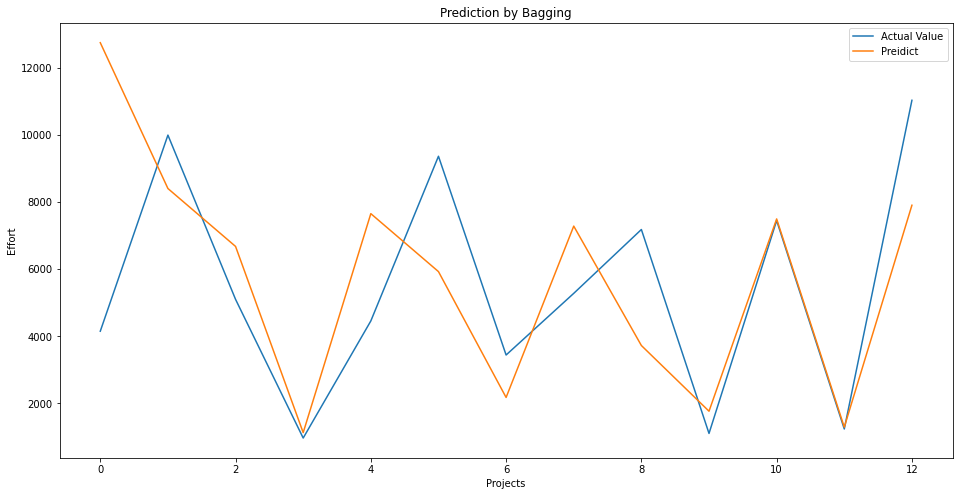

In [18]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Bagging")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()